In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")


In [3]:
cols = [
    "Start_Time",
    "Start_Lat",
    "Start_Lng",
    "Weather_Condition",
    "Visibility(mi)",
    "Precipitation(in)",
    "Severity",
    "Sunrise_Sunset",
    "State"
]

df = pd.read_csv(
    "data/US_Accidents.csv",
    usecols=cols,
    nrows=100000
)

df.head()


,Severity,Start_Time,Start_Lat,Start_Lng,State,Visibility(mi),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,3,2016-02-08 05:46:00,39.865147,-84.058723,OH,10.0,0.02,Light Rain,Night
1,2,2016-02-08 06:07:59,39.928059,-82.831184,OH,10.0,0.00,Light Rain,Night
2,2,2016-02-08 06:49:27,39.063148,-84.032608,OH,10.0,NaN,Overcast,Night
3,3,2016-02-08 07:23:34,39.747753,-84.205582,OH,9.0,NaN,Mostly Cloudy,Night
4,2,2016-02-08 07:39:07,39.627781,-84.188354,OH,6.0,NaN,Mostly Cloudy,Day


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           100000 non-null  int64  
 1   Start_Time         100000 non-null  object 
 2   Start_Lat          100000 non-null  float64
 3   Start_Lng          100000 non-null  float64
 4   State              100000 non-null  object 
 5   Visibility(mi)     98154 non-null   float64
 6   Precipitation(in)  7368 non-null    float64
 7   Weather_Condition  98396 non-null   object 
 8   Sunrise_Sunset     99999 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 6.9+ MB


In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

df["Hour"] = df["Start_Time"].dt.hour

df[["Start_Time", "Hour"]].head()


,Start_Time,Hour
0,2016-02-08 05:46:00,5
1,2016-02-08 06:07:59,6
2,2016-02-08 06:49:27,6
3,2016-02-08 07:23:34,7
4,2016-02-08 07:39:07,7


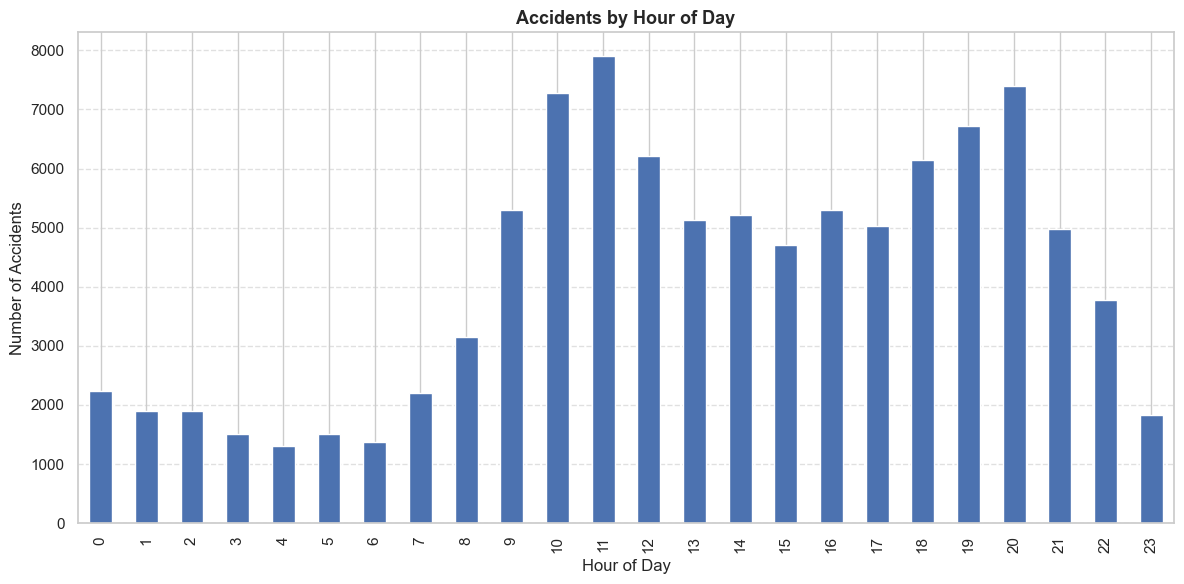

In [8]:
plt.figure(figsize=(12, 6))

df["Hour"].value_counts().sort_index().plot(
    kind="bar",
    color="#4C72B0"
)

plt.title("Accidents by Hour of Day", fontsize=13, fontweight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/accidents_by_hour.png", dpi=300)
plt.show()


In [10]:
df["Month"] = df["Start_Time"].dt.month

df[["Start_Time", "Month"]].head()


,Start_Time,Month
0,2016-02-08 05:46:00,2
1,2016-02-08 06:07:59,2
2,2016-02-08 06:49:27,2
3,2016-02-08 07:23:34,2
4,2016-02-08 07:39:07,2


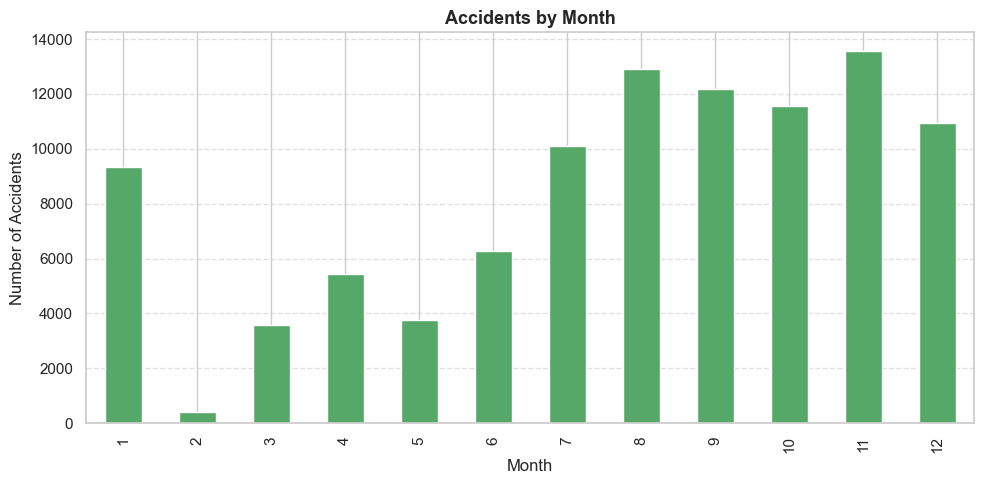

In [11]:
plt.figure(figsize=(10, 5))

df["Month"].value_counts().sort_index().plot(
    kind="bar",
    color="#55A868"
)

plt.title("Accidents by Month", fontsize=13, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/accidents_by_month.png", dpi=300)
plt.show()


In [12]:
df["Weather_Condition"].value_counts().head(10)


Weather_Condition
Clear               57255
Overcast            10255
Mostly Cloudy        8829
Partly Cloudy        8260
Scattered Clouds     5684
Light Rain           3211
Haze                 2097
Fair                 1039
Rain                  829
Heavy Rain            202
Name: count, dtype: int64

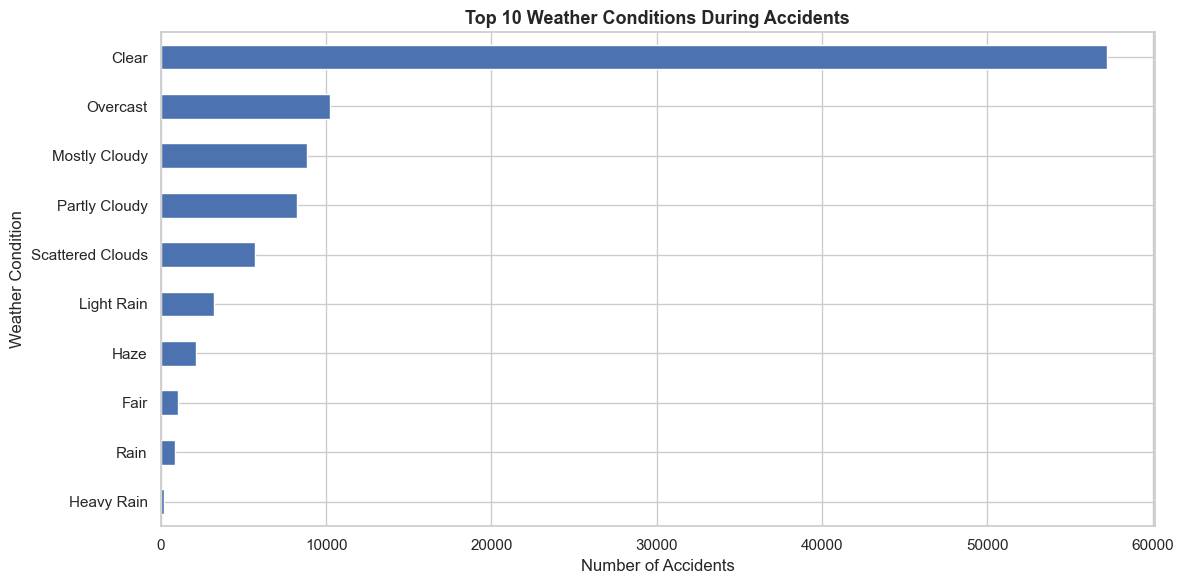

In [13]:
top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(12, 6))

top_weather.sort_values().plot(
    kind="barh",
    color="#4C72B0"
)

plt.title("Top 10 Weather Conditions During Accidents", fontsize=13, fontweight="bold")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")

plt.tight_layout()
plt.savefig("visualization/top_weather_conditions.png", dpi=300)
plt.show()


In [14]:
df_vis = df.dropna(subset=["Visibility(mi)"])

df_vis[["Severity", "Visibility(mi)"]].head()


,Severity,Visibility(mi)
0,3,10.0
1,2,10.0
2,2,10.0
3,3,9.0
4,2,6.0


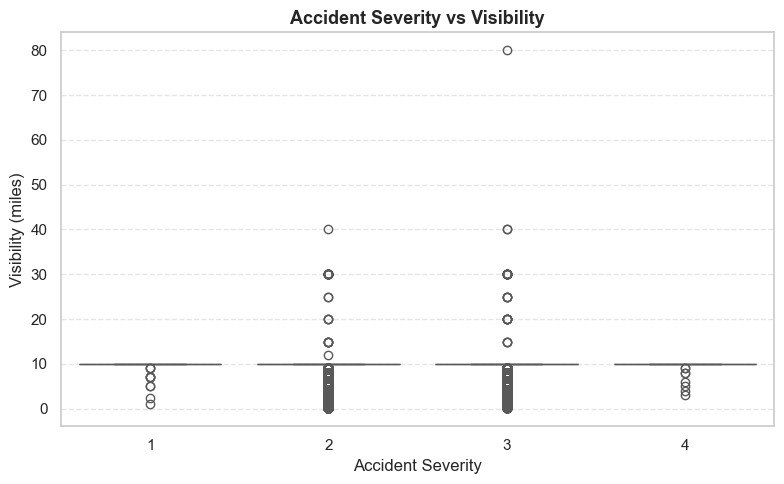

In [16]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_vis,
    x="Severity",
    y="Visibility(mi)",
    hue="Severity",
    palette="Set2",
    legend=False
)

plt.title("Accident Severity vs Visibility", fontsize=13, fontweight="bold")
plt.xlabel("Accident Severity")
plt.ylabel("Visibility (miles)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("visualization/severity_vs_visibility.png", dpi=300)
plt.show()
